# [readme](https://github.com/ml-explore/mlx-examples/tree/main/stable_diffusion)

In [1]:
dependencies = [
    "diffusers",
    "transformers",
    "accelerate",
    "huggingface-hub",
    "regex",
    "numpy",
    "tqdm",
    "Pillow"
]

!pip install -U {" ".join(dependencies)}

In [2]:
import torch
import gc
import numpy as np
from PIL import Image

In [1]:
import mlx.core as mx
from stable_diffusion import StableDiffusion

# This will download all the weights from HF hub and load the models in
# memory
sd = StableDiffusion(
            "stabilityai/stable-diffusion-2-1-base", float16=True
        )

# This creates a python generator that returns the latent produced by the
# reverse diffusion process.
#
# Because MLX is lazily evaluated iterating over this generator doesn't
# actually perform the computation until mx.eval() is called.
latent_generator = sd.generate_latents(
        "A photo of a beautiful instagram model riding a horse.",
        n_images=1,
        cfg_weight=7.5,
        num_steps=50,
        seed=0,
        negative_text="ugly, strange, bad hands, abnormal, unnatural, weird, no head, bad feets",
    )

# Here we are evaluating each diffusion step but we could also evaluate
# once at the end.
for x_t in latent_generator:
    mx.eval(x_t)

# Now x_t is the last latent from the reverse process aka x_0. We can
# decode it into an image using the stable diffusion VAE.
im = sd.decode(x_t)
im

gc.collect()
torch.cuda.empty_cache()

: 

In [ ]:
im.shape

(512, 512, 3)

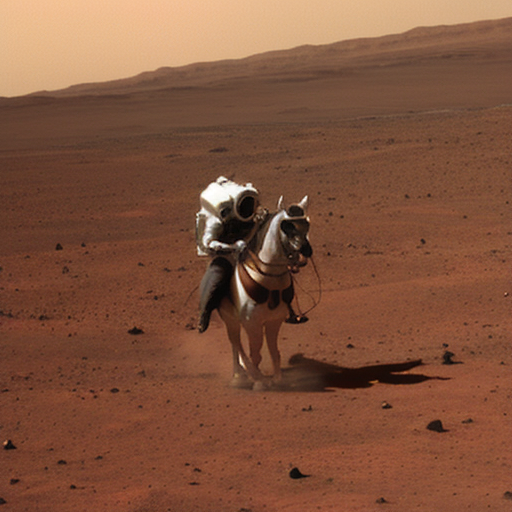

In [ ]:
# im = np.array(im)
# if im.shape[0] == 1:
#     im = im.squeeze(0)
Image.fromarray(np.array(im).squeeze(0))

In [ ]:
!python txt2image.py "(8k),best quality, (photorealistic,realistic:1.2), 1girl, solo, detailed face, standing,black hair,(hair ornament:1.35), (looking at viewer:1.5),natural breasts out,short hair, black eyes, bangs, lips, glasses" --n_images 4 --n_rows 2

100%|█████████████████████████████████████████████| 4/4 [00:07<00:00,  1.76s/it]
